/home/students/txuan/class/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-12-16 15:28:27.219543: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-16 15:28:27.219895: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-16 15:28:27.267708: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow wi

Filtered dataset shape (Age 50–80): (2094, 12)

=== Shapiro–Wilk Normality Tests (Age 50–80) ===
age: p-value = 0.0000
avg_glucose_level: p-value = 0.0000
bmi: p-value = 0.0000

=== T-Tests (Stroke vs No-Stroke) ===
age: p-value = 1.4648e-15
avg_glucose_level: p-value = 9.5782e-06
bmi: p-value = 9.0306e-01

=== Chi-Square Tests (Categorical vs Stroke) ===
gender: p-value = 7.8886e-01
ever_married: p-value = 3.2932e-01
work_type: p-value = 2.0887e-01
Residence_type: p-value = 8.9303e-01
smoking_status: p-value = 3.5005e-01
hypertension: p-value = 2.6293e-05
heart_disease: p-value = 2.5272e-04


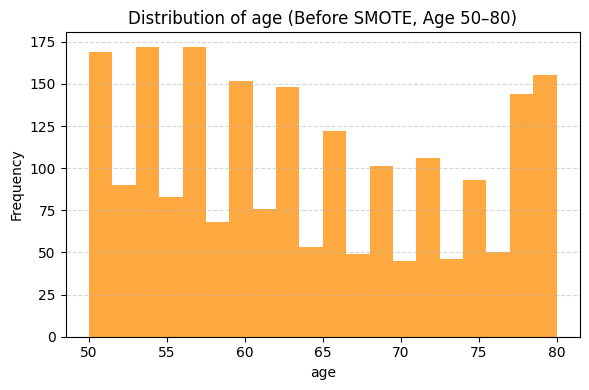

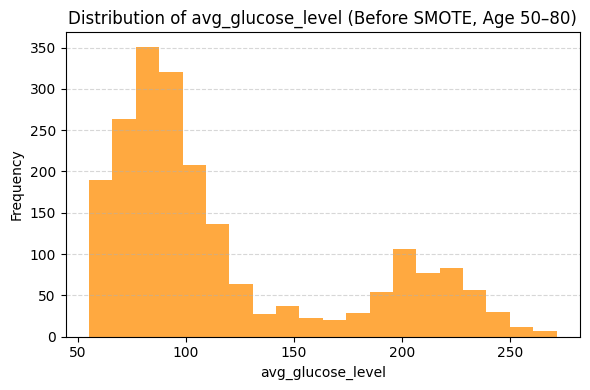

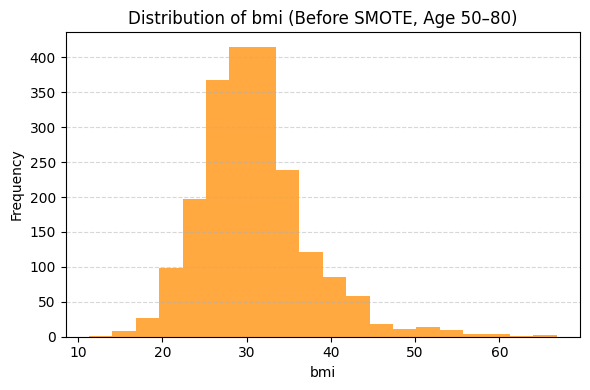

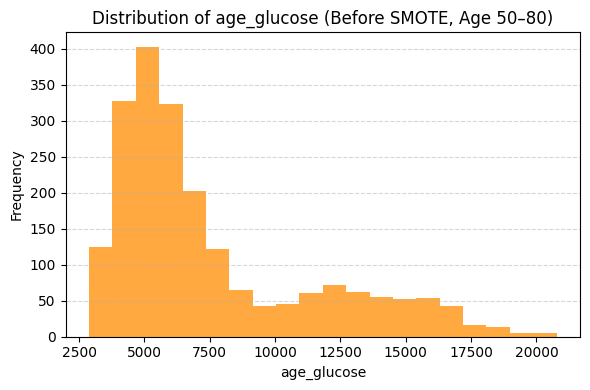

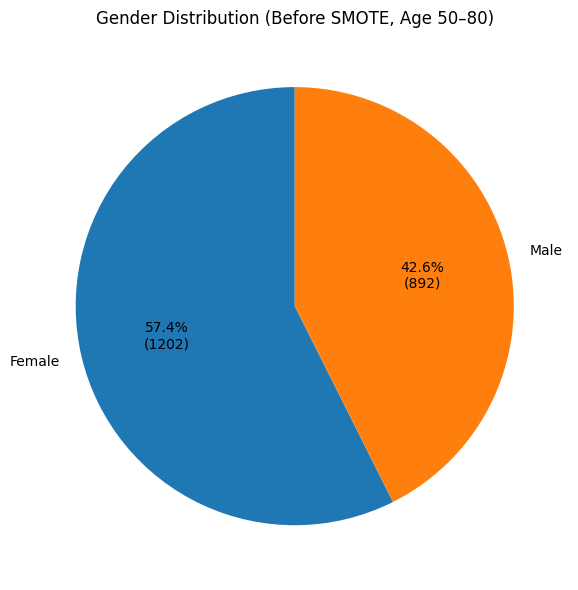

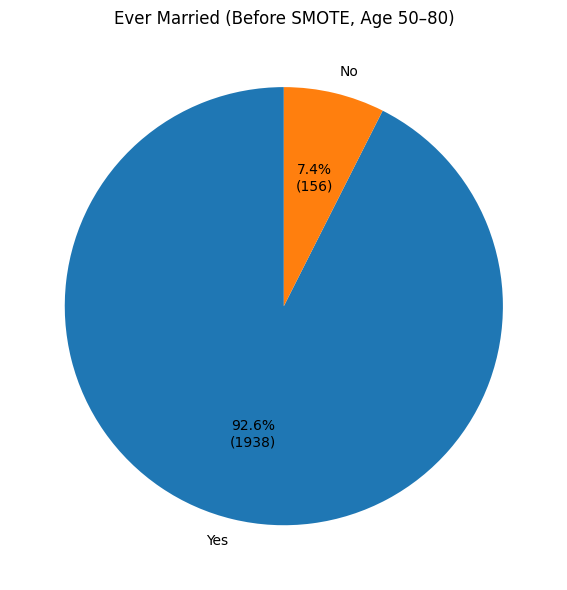

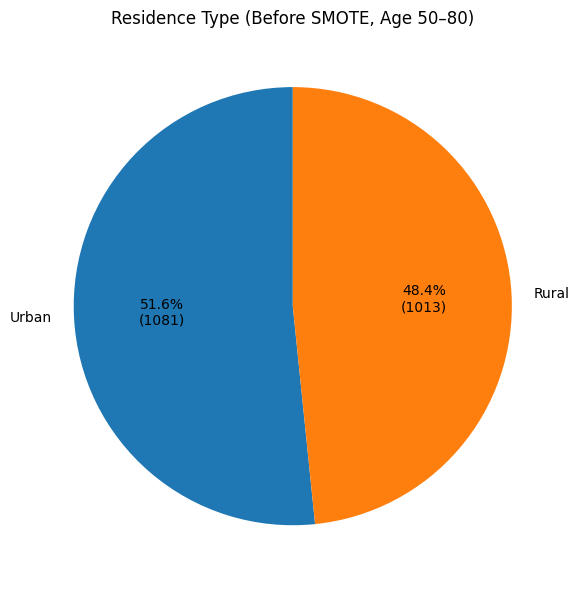

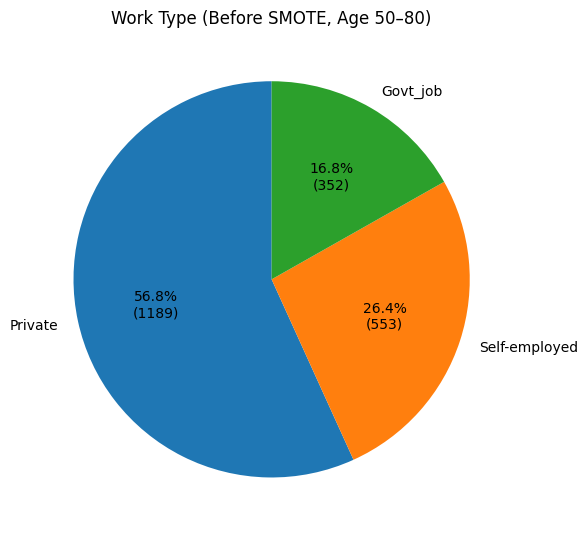

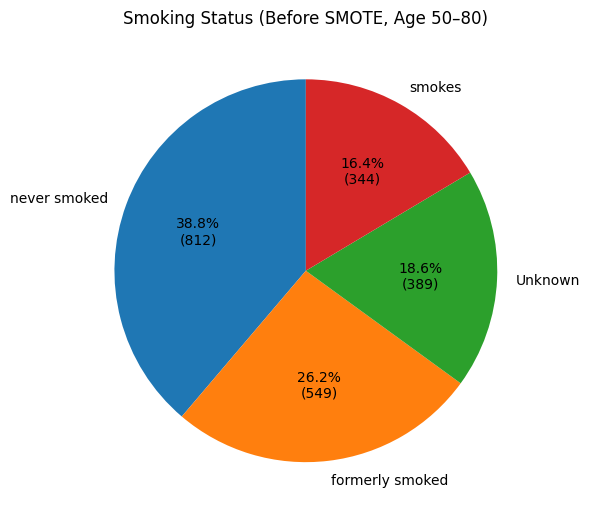

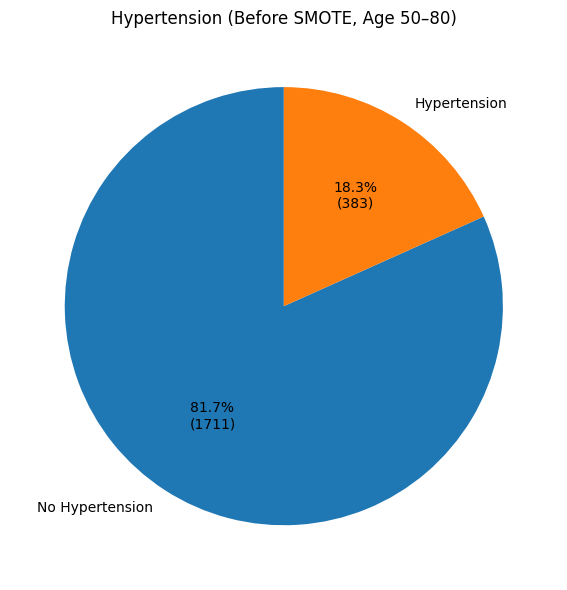

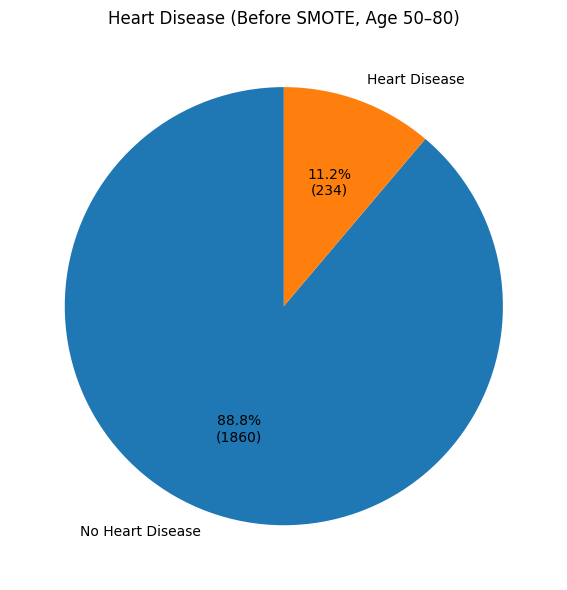


=== CLASS DISTRIBUTION BEFORE SMOTE (Age 50–80) ===
stroke
0    1888
1     206
Name: count, dtype: int64


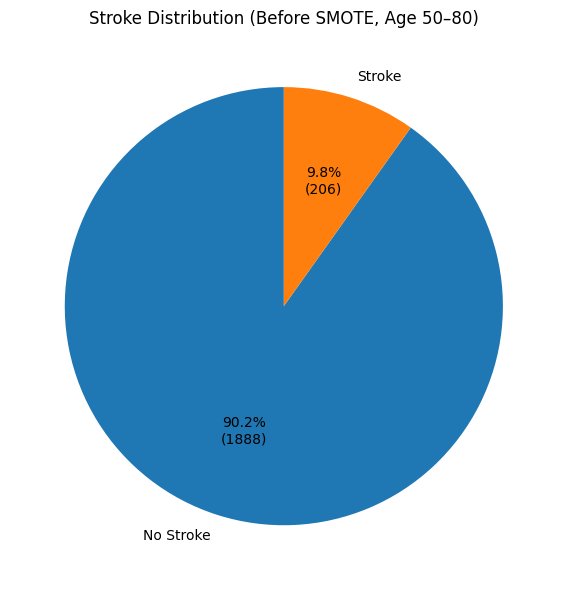

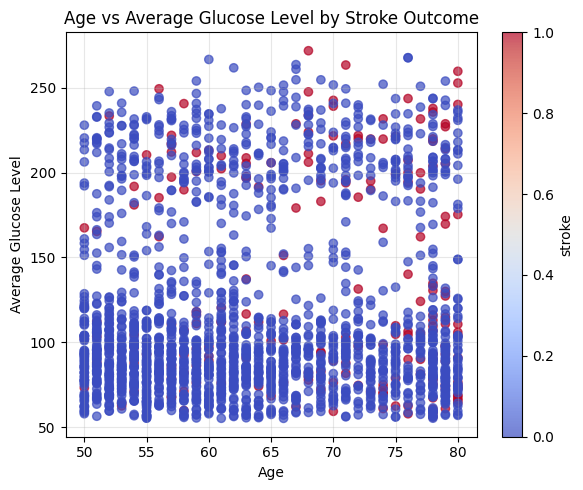

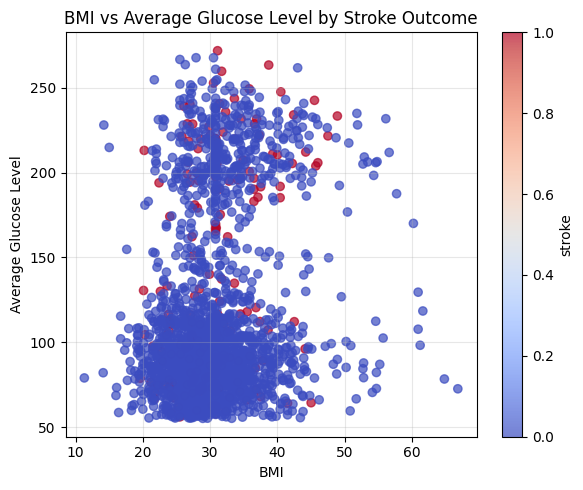

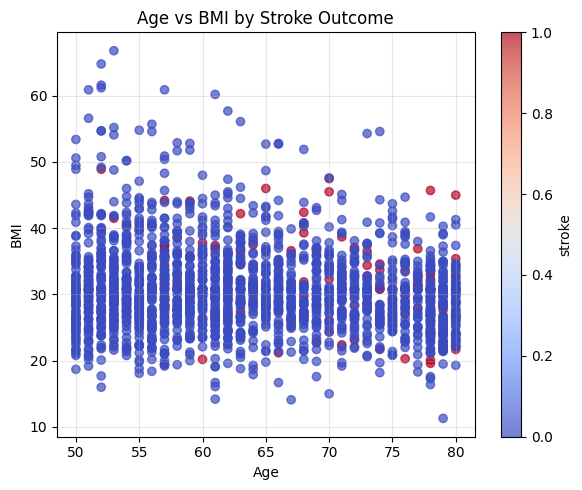


=== Pearson Correlation Matrix (Selected Features) ===
                        age  avg_glucose_level       bmi  age_glucose  \
age                1.000000           0.084319 -0.157405     0.358532   
avg_glucose_level  0.084319           1.000000  0.189023     0.951475   
bmi               -0.157405           0.189023  1.000000     0.126171   
age_glucose        0.358532           0.951475  0.126171     1.000000   
htn_hd             0.092580           0.105414  0.023703     0.125837   
stroke             0.183323           0.110733 -0.002333     0.156053   

                     htn_hd    stroke  
age                0.092580  0.183323  
avg_glucose_level  0.105414  0.110733  
bmi                0.023703 -0.002333  
age_glucose        0.125837  0.156053  
htn_hd             1.000000  0.048861  
stroke             0.048861  1.000000  

=== Correlation of Each Variable with Stroke ===
stroke               1.000000
age                  0.183323
age_glucose          0.156053
avg_glucose_

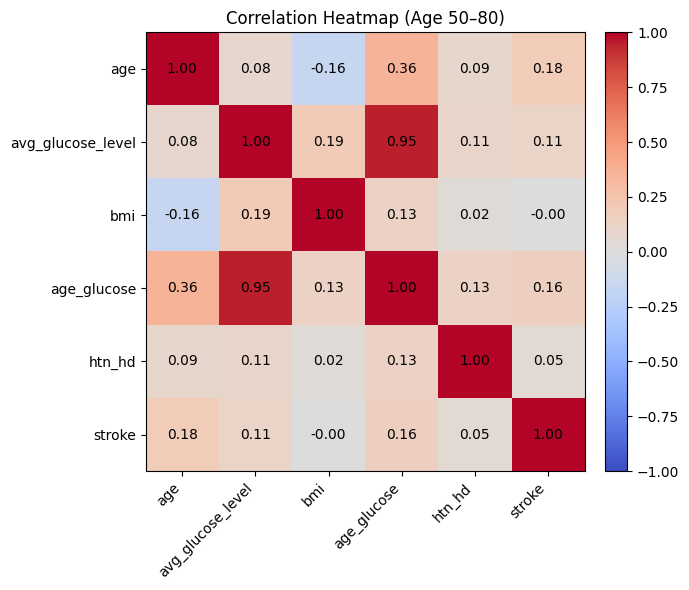


=== Variance Inflation Factors (VIF) ===
                           Feature        VIF
0                              age   5.811151
1                avg_glucose_level  53.058267
2                              bmi   1.083112
3                      age_glucose  60.266094
4                      gender_Male   1.775054
5                 ever_married_Yes   7.569960
6                work_type_Private   3.739979
7          work_type_Self-employed   2.341024
8             Residence_type_Urban   1.963132
9   smoking_status_formerly smoked   2.204208
10     smoking_status_never smoked   2.718359
11           smoking_status_smokes   1.781449
12                              id   3.577898
13                    hypertension   1.480319
14                   heart_disease   1.534682
15                          htn_hd   1.496597

Train shape: (1465, 16) Test shape: (629, 16)

Class distribution in TRAIN (before SMOTE):
stroke
0    1321
1     144
Name: count, dtype: int64

Class distribution in TEST:
st

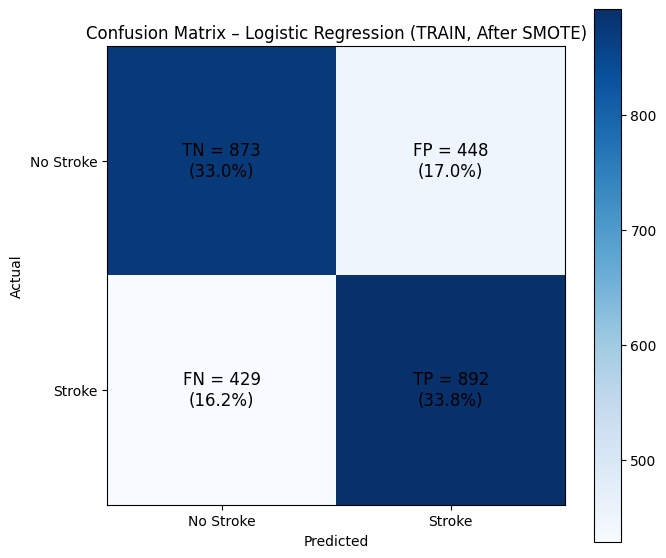

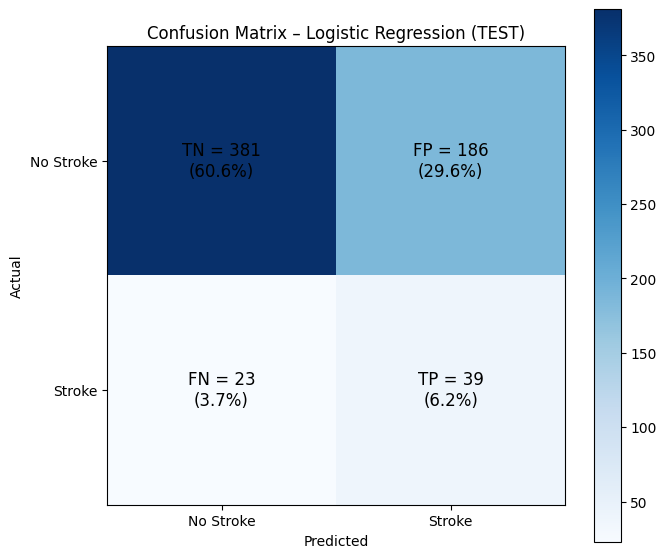

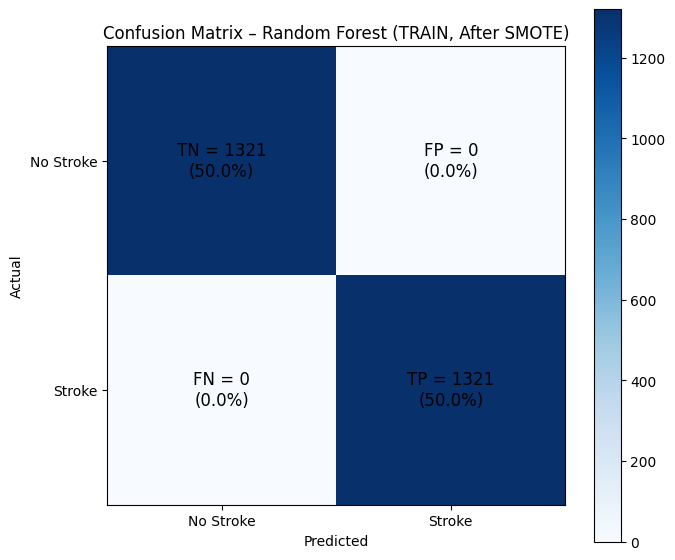

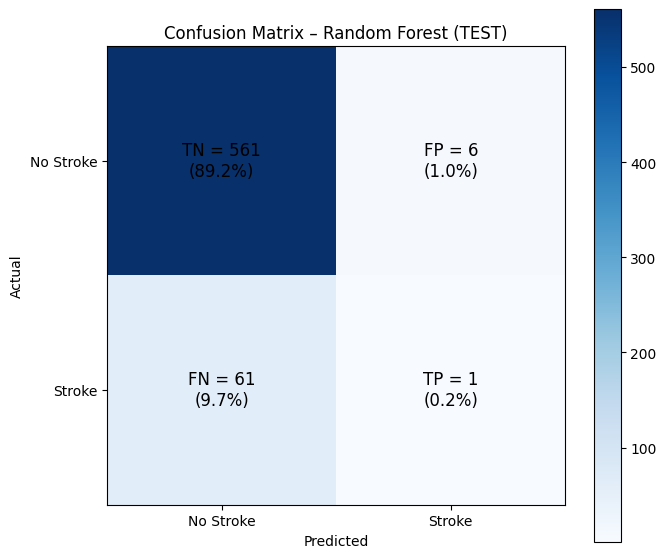

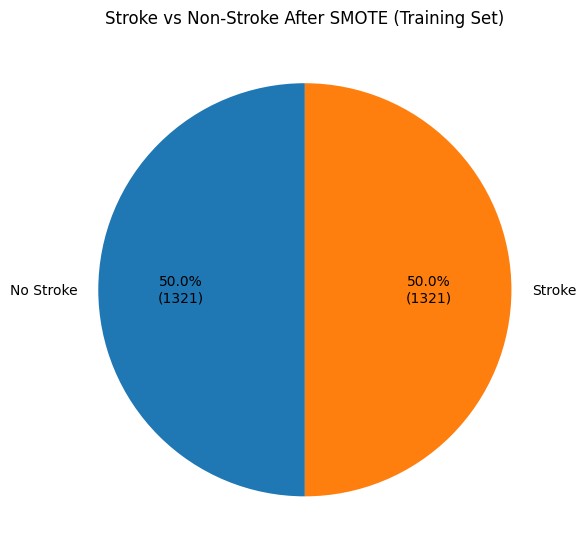

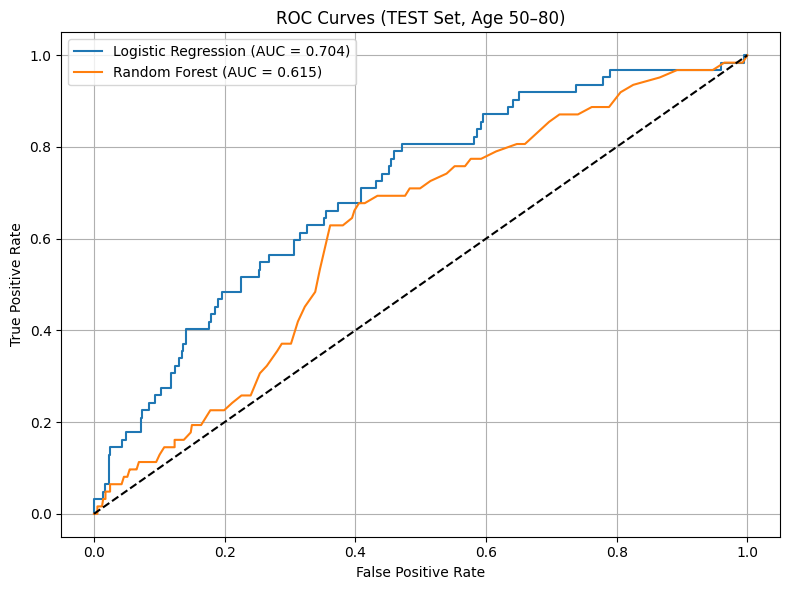

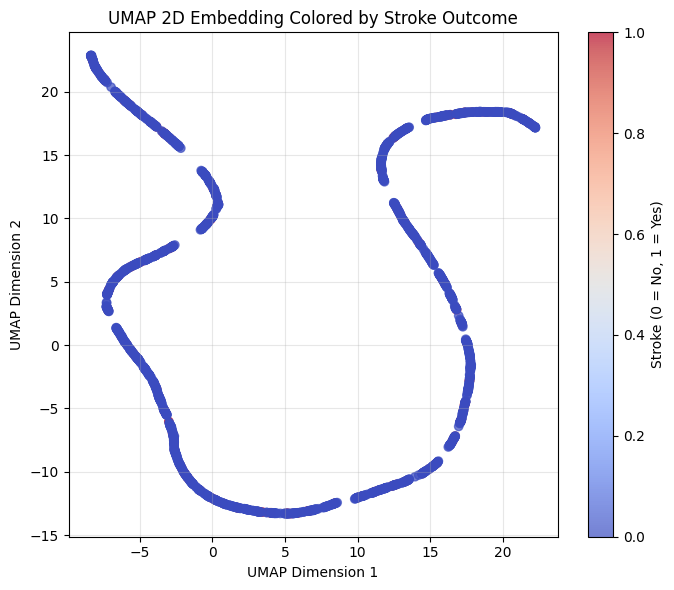

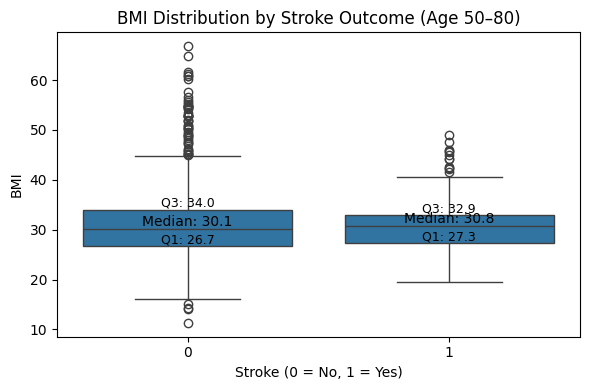

<Figure size 1000x500 with 0 Axes>

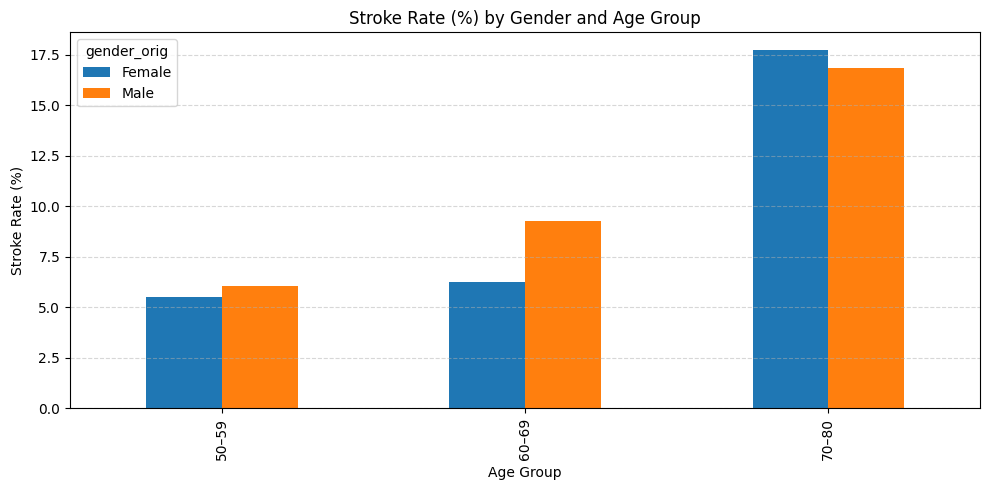

<Figure size 1000x500 with 0 Axes>

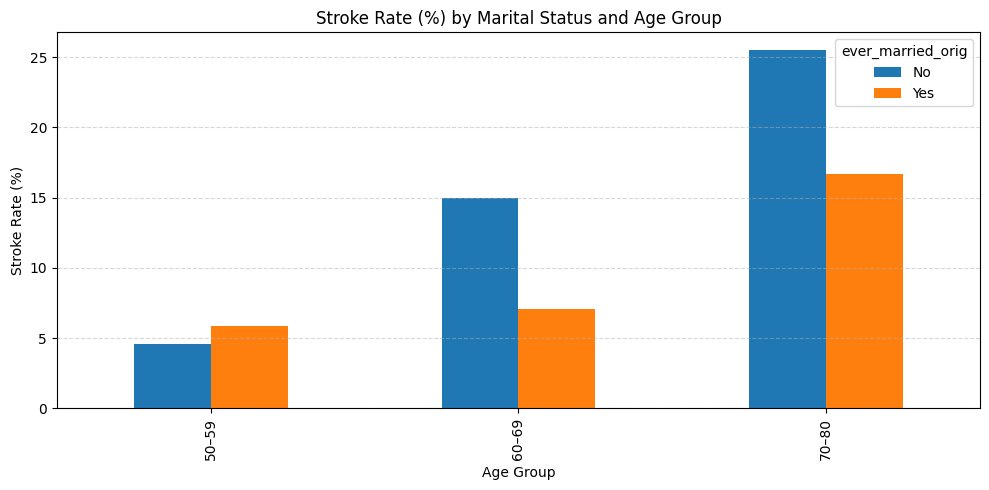

<Figure size 1000x500 with 0 Axes>

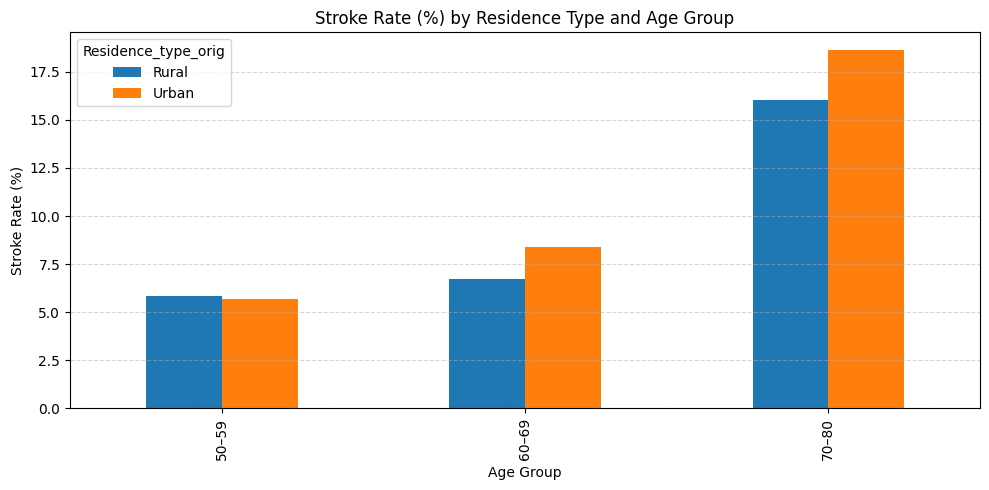

<Figure size 1000x500 with 0 Axes>

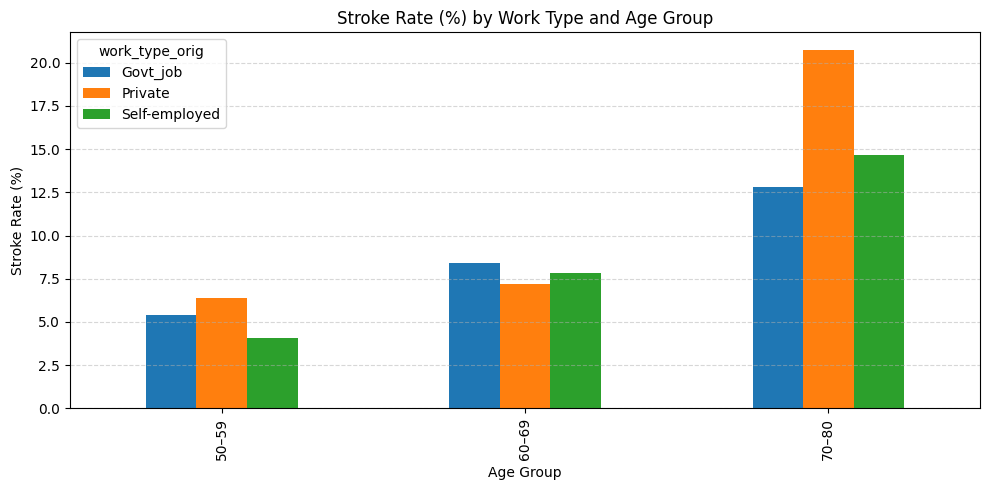

<Figure size 1000x500 with 0 Axes>

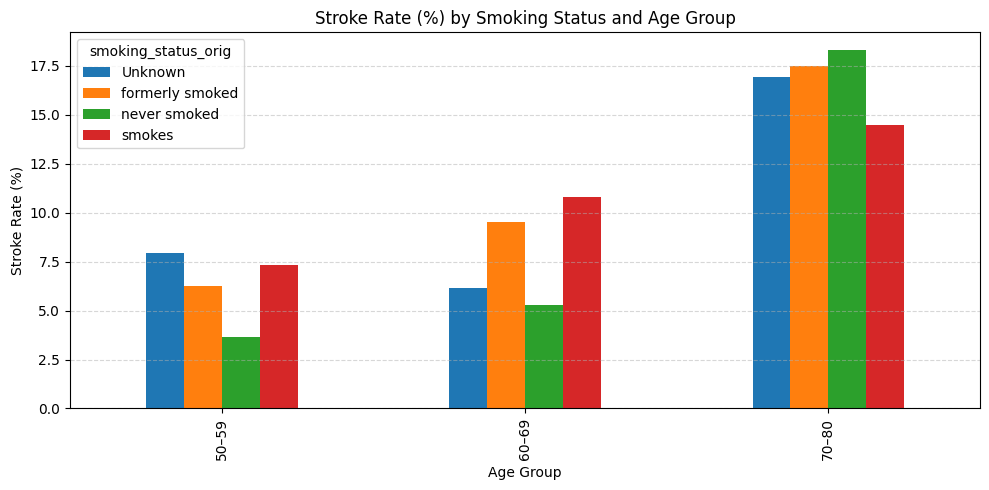

<Figure size 1000x500 with 0 Axes>

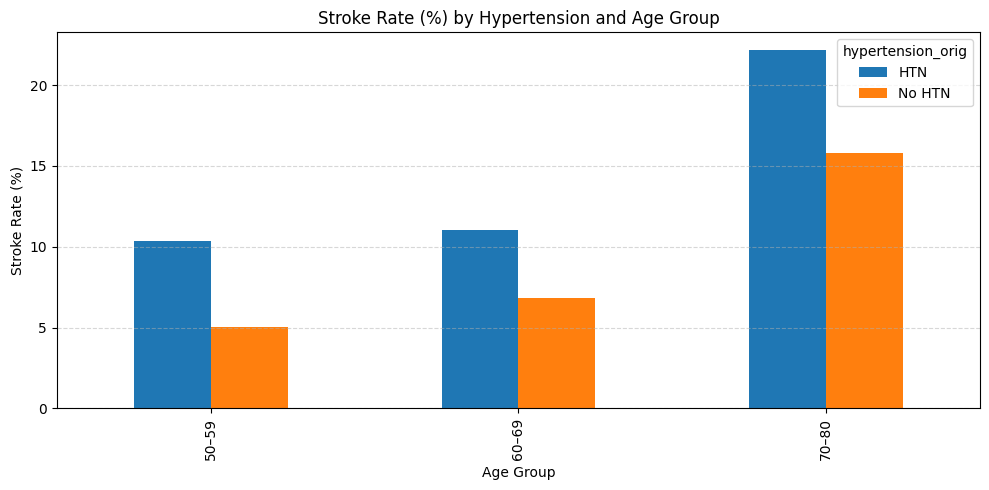

<Figure size 1000x500 with 0 Axes>

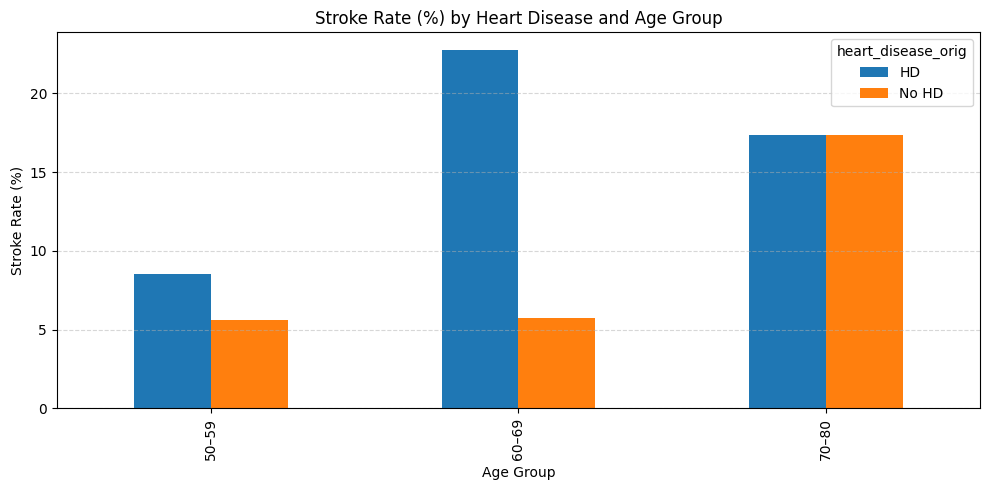

<Figure size 1000x600 with 0 Axes>

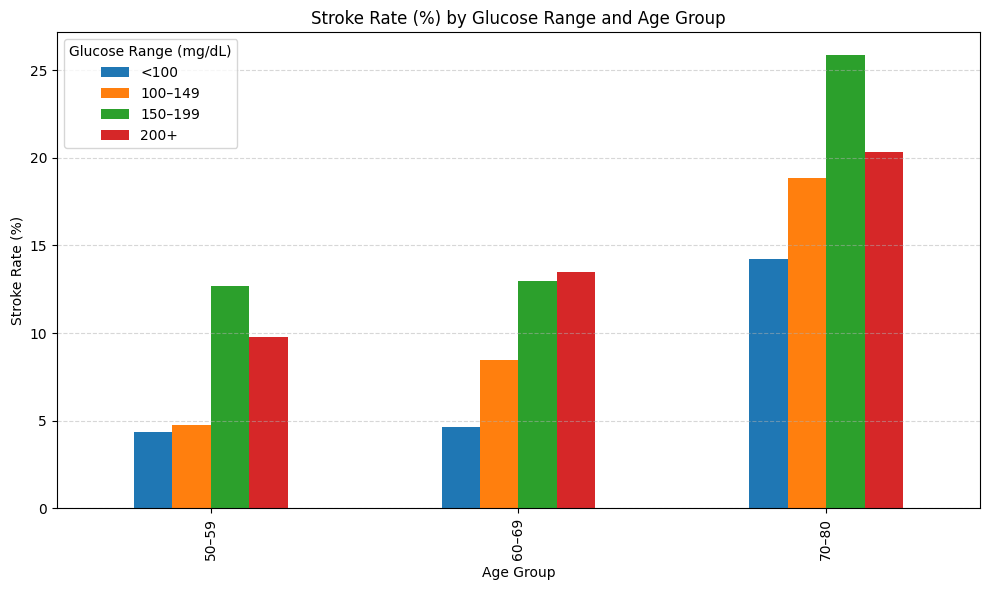

In [2]:
# =====================================================
# 1. IMPORT LIBRARIES
# =====================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind, chi2_contingency, shapiro
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    auc
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression  # if needed later

from imblearn.over_sampling import SMOTE

from statsmodels.stats.outliers_influence import variance_inflation_factor

from umap import UMAP  # UMAP is installed per your confirmation

import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


# =====================================================
# 2. LOAD DATA + FILTER AGE 50–80 ONLY
# =====================================================

stroke_df = pd.read_csv("healthcare-dataset-stroke-data.csv")

# Filter to ages 50–80 only
stroke_df = stroke_df[(stroke_df["age"] >= 50) & (stroke_df["age"] <= 80)]

print("Filtered dataset shape (Age 50–80):", stroke_df.shape)


# =====================================================
# 3. HANDLE MISSING VALUES (BMI)
# =====================================================

stroke_df["bmi"] = pd.to_numeric(stroke_df["bmi"], errors="coerce")
stroke_df["bmi"] = stroke_df["bmi"].fillna(stroke_df["bmi"].mean())


# =====================================================
# 4. ADD INTERACTION TERMS
# =====================================================

stroke_df["age_glucose"] = stroke_df["age"] * stroke_df["avg_glucose_level"]
stroke_df["htn_hd"] = stroke_df["hypertension"] * stroke_df["heart_disease"]


# =====================================================
# 5. NORMALITY TESTING (Shapiro–Wilk)
# =====================================================

numeric_cols = ["age", "avg_glucose_level", "bmi"]

print("\n=== Shapiro–Wilk Normality Tests (Age 50–80) ===")
for col in numeric_cols:
    stat, p = shapiro(stroke_df[col])
    print(f"{col}: p-value = {p:.4f}")


# =====================================================
# 6. STATISTICAL TESTING (T-tests + Chi-Square)
# =====================================================

stroke_group = stroke_df[stroke_df["stroke"] == 1]
nostroke_group = stroke_df[stroke_df["stroke"] == 0]

print("\n=== T-Tests (Stroke vs No-Stroke) ===")
for col in numeric_cols:
    t, p = ttest_ind(stroke_group[col], nostroke_group[col], equal_var=False)
    print(f"{col}: p-value = {p:.4e}")

# For chi-square, drop Unknown smoking_status
chi_df = stroke_df[stroke_df["smoking_status"] != "Unknown"]

categorical_cols = [
    "gender", "ever_married", "work_type",
    "Residence_type", "smoking_status",
    "hypertension", "heart_disease"
]

print("\n=== Chi-Square Tests (Categorical vs Stroke) ===")
for col in categorical_cols:
    table = pd.crosstab(chi_df[col], chi_df["stroke"])
    chi2, p, _, _ = chi2_contingency(table)
    print(f"{col}: p-value = {p:.4e}")


# =====================================================
# 7. VISUALIZATIONS BEFORE SMOTE – HISTOGRAMS (Numeric)
# =====================================================

numeric_cols_before = ["age", "avg_glucose_level", "bmi", "age_glucose"]

for col in numeric_cols_before:
    plt.figure(figsize=(6, 4))
    plt.hist(stroke_df[col], bins=20, color="darkorange", alpha=0.75)
    plt.title(f"Distribution of {col} (Before SMOTE, Age 50–80)")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()


# =====================================================
# 8. PIE CHART FUNCTION + CLASS DISTRIBUTIONS (Before SMOTE)
# =====================================================

def pie_chart(series, title):
    counts = series.value_counts()
    labels = counts.index
    values = counts.values

    def autopct_format(values_inner):
        def inner(pct):
            total = sum(values_inner)
            count = int(round(pct * total / 100))
            return f"{pct:.1f}%\n({count})"
        return inner

    plt.figure(figsize=(6, 6))
    plt.pie(values, labels=labels, autopct=autopct_format(values), startangle=90)
    plt.title(title)
    plt.tight_layout()
    plt.show()


pie_chart(stroke_df["gender"], "Gender Distribution (Before SMOTE, Age 50–80)")
pie_chart(stroke_df["ever_married"], "Ever Married (Before SMOTE, Age 50–80)")
pie_chart(stroke_df["Residence_type"], "Residence Type (Before SMOTE, Age 50–80)")
pie_chart(stroke_df["work_type"], "Work Type (Before SMOTE, Age 50–80)")
pie_chart(stroke_df["smoking_status"], "Smoking Status (Before SMOTE, Age 50–80)")
pie_chart(stroke_df["hypertension"].map({0: "No Hypertension", 1: "Hypertension"}),
          "Hypertension (Before SMOTE, Age 50–80)")
pie_chart(stroke_df["heart_disease"].map({0: "No Heart Disease", 1: "Heart Disease"}),
          "Heart Disease (Before SMOTE, Age 50–80)")

print("\n=== CLASS DISTRIBUTION BEFORE SMOTE (Age 50–80) ===")
print(stroke_df["stroke"].value_counts())
pie_chart(stroke_df["stroke"].map({0: "No Stroke", 1: "Stroke"}),
          "Stroke Distribution (Before SMOTE, Age 50–80)")


# =====================================================
# 9. NEW: SCATTER PLOTS (Matplotlib) – TA Requirement
# =====================================================

# Helper function for scatter plots
def scatter_plot(df, x, y, hue, title, xlabel=None, ylabel=None):
    plt.figure(figsize=(6, 5))
    scatter = plt.scatter(
        df[x], df[y],
        c=df[hue],
        cmap="coolwarm",
        alpha=0.7
    )
    plt.colorbar(scatter, label=hue)
    plt.title(title)
    plt.xlabel(xlabel if xlabel else x)
    plt.ylabel(ylabel if ylabel else y)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Example scatter plots colored by stroke
scatter_plot(
    stroke_df,
    x="age",
    y="avg_glucose_level",
    hue="stroke",
    title="Age vs Average Glucose Level by Stroke Outcome",
    xlabel="Age",
    ylabel="Average Glucose Level"
)

scatter_plot(
    stroke_df,
    x="bmi",
    y="avg_glucose_level",
    hue="stroke",
    title="BMI vs Average Glucose Level by Stroke Outcome",
    xlabel="BMI",
    ylabel="Average Glucose Level"
)

scatter_plot(
    stroke_df,
    x="age",
    y="bmi",
    hue="stroke",
    title="Age vs BMI by Stroke Outcome",
    xlabel="Age",
    ylabel="BMI"
)


# =====================================================
# 10. NEW: CORRELATION MATRIX + HEATMAP + r-VALUES
# =====================================================

corr_cols = ["age", "avg_glucose_level", "bmi", "age_glucose", "htn_hd", "stroke"]
corr_matrix = stroke_df[corr_cols].corr()

print("\n=== Pearson Correlation Matrix (Selected Features) ===")
print(corr_matrix)

print("\n=== Correlation of Each Variable with Stroke ===")
print(corr_matrix["stroke"].sort_values(ascending=False))

# Matplotlib heatmap
plt.figure(figsize=(7, 6))
im = plt.imshow(corr_matrix, cmap="coolwarm", vmin=-1, vmax=1)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.title("Correlation Heatmap (Age 50–80)")

tick_marks = np.arange(len(corr_cols))
plt.xticks(tick_marks, corr_cols, rotation=45, ha="right")
plt.yticks(tick_marks, corr_cols)

# Annotate each cell with correlation value
for i in range(len(corr_cols)):
    for j in range(len(corr_cols)):
        value = corr_matrix.iloc[i, j]
        plt.text(j, i, f"{value:.2f}", ha="center", va="center", color="black")

plt.tight_layout()
plt.show()


# =====================================================
# 11. ENCODING + SCALING
# =====================================================

X = stroke_df.drop("stroke", axis=1)
y = stroke_df["stroke"]

numeric_features = ["age", "avg_glucose_level", "bmi", "age_glucose"]
categorical_features = ["gender", "ever_married", "work_type",
                        "Residence_type", "smoking_status"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features)
    ],
    remainder="passthrough"
)

X_processed = preprocessor.fit_transform(X)


# =====================================================
# 12. FEATURE NAME EXTRACTION
# =====================================================

def get_feature_names_fixed(ct, input_features):
    output_names = []

    for name, transformer, columns in ct.transformers_:

        if name == "remainder" and transformer == "passthrough":
            # columns here is an index of remaining columns
            output_names.extend(columns)
            continue

        if hasattr(transformer, "categories_"):
            # OneHotEncoder
            for col, cats in zip(columns, transformer.categories_):
                for cat in cats[1:]:
                    output_names.append(f"{col}_{cat}")
            continue

        if hasattr(transformer, "get_feature_names_out"):
            output_names.extend(list(transformer.get_feature_names_out(columns)))
        else:
            output_names.extend(columns)

    return output_names

input_features = list(X.columns)
feature_names = get_feature_names_fixed(preprocessor, input_features)


# =====================================================
# 13. MULTICOLLINEARITY CHECK (VIF)
# =====================================================

print("\n=== Variance Inflation Factors (VIF) ===")
vif_df = pd.DataFrame()
vif_df["Feature"] = feature_names
vif_df["VIF"] = [variance_inflation_factor(X_processed, i)
                 for i in range(X_processed.shape[1])]
print(vif_df)


# =====================================================
# 14. TRAIN/TEST SPLIT (70/30)
# =====================================================

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.3, random_state=42, stratify=y
)

print("\nTrain shape:", X_train.shape, "Test shape:", X_test.shape)
print("\nClass distribution in TRAIN (before SMOTE):")
print(y_train.value_counts())
print("\nClass distribution in TEST:")
print(y_test.value_counts())


# =====================================================
# 15. APPLY SMOTE (TRAINING SET ONLY)
# =====================================================

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("\n=== CLASS DISTRIBUTION AFTER SMOTE (TRAIN ONLY) ===")
print(y_train_res.value_counts())


# =====================================================
# 16. MACHINE LEARNING MODELS (Logistic Regression & Random Forest)
# =====================================================

# Logistic Regression
logreg = LogisticRegression(max_iter=300, random_state=42)
logreg.fit(X_train_res, y_train_res)
y_pred_lr_test = logreg.predict(X_test)
y_pred_lr_train = logreg.predict(X_train_res)

print("\n=== Logistic Regression Performance (TEST) ===")
print(classification_report(y_test, y_pred_lr_test))

# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_res, y_train_res)
y_pred_rf_test = rf.predict(X_test)
y_pred_rf_train = rf.predict(X_train_res)

print("\n=== Random Forest Performance (TEST) ===")
print(classification_report(y_test, y_pred_rf_test))


# =====================================================
# 17. NEW: GENERIC CONFUSION MATRIX PLOT (TRAIN + TEST, BOTH MODELS)
# =====================================================

def plot_confusion_matrix_with_labels(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    TN, FP, FN, TP = cm.ravel()

    total = cm.sum()
    TN_p = TN / total * 100
    FP_p = FP / total * 100
    FN_p = FN / total * 100
    TP_p = TP / total * 100

    labels = np.array([
        [f"TN = {TN}\n({TN_p:.1f}%)", f"FP = {FP}\n({FP_p:.1f}%)"],
        [f"FN = {FN}\n({FN_p:.1f}%)", f"TP = {TP}\n({TP_p:.1f}%)"]
    ])

    plt.figure(figsize=(7, 6))
    plt.imshow(cm, cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    plt.xticks([0, 1], ["No Stroke", "Stroke"])
    plt.yticks([0, 1], ["No Stroke", "Stroke"])

    for i in range(2):
        for j in range(2):
            plt.text(j, i, labels[i, j],
                     ha='center', va='center',
                     fontsize=12, color='black')

    plt.colorbar()
    plt.tight_layout()
    plt.show()


# --- Logistic Regression: TRAIN and TEST ---
plot_confusion_matrix_with_labels(
    y_train_res, y_pred_lr_train,
    "Confusion Matrix – Logistic Regression (TRAIN, After SMOTE)"
)

plot_confusion_matrix_with_labels(
    y_test, y_pred_lr_test,
    "Confusion Matrix – Logistic Regression (TEST)"
)

# --- Random Forest: TRAIN and TEST ---
plot_confusion_matrix_with_labels(
    y_train_res, y_pred_rf_train,
    "Confusion Matrix – Random Forest (TRAIN, After SMOTE)"
)

plot_confusion_matrix_with_labels(
    y_test, y_pred_rf_test,
    "Confusion Matrix – Random Forest (TEST)"
)


# =====================================================
# 18. PIE CHART — AFTER SMOTE (TRAIN SET)
# =====================================================

stroke_counts_after_smote = y_train_res.value_counts()
labels_pie = ["No Stroke", "Stroke"]

sizes = [
    stroke_counts_after_smote.get(0, 0),
    stroke_counts_after_smote.get(1, 0)
]

def autopct_format(values):
    def inner(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f"{pct:.1f}%\n({count})"
    return inner

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels_pie, autopct=autopct_format(sizes), startangle=90)
plt.title("Stroke vs Non-Stroke After SMOTE (Training Set)")
plt.tight_layout()
plt.show()


# =====================================================
# 19. ROC CURVES (Logistic Regression + Random Forest)
# =====================================================

# Predicted probabilities for positive class
y_prob_lr = logreg.predict_proba(X_test)[:, 1]
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# ROC points
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

# AUC
auc_lr = auc(fpr_lr, tpr_lr)
auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.3f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.3f})")
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves (TEST Set, Age 50–80)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# =====================================================
# 20. UMAP VISUALIZATION (Unsupervised 2D Embedding)
# =====================================================

umap_2d = UMAP(n_components=2, random_state=42)
X_umap = umap_2d.fit_transform(X_processed)

plt.figure(figsize=(7, 6))
scatter_umap = plt.scatter(
    X_umap[:, 0], X_umap[:, 1],
    c=y,
    cmap="coolwarm",
    alpha=0.7
)
plt.colorbar(scatter_umap, label="Stroke (0 = No, 1 = Yes)")
plt.title("UMAP 2D Embedding Colored by Stroke Outcome")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# =====================================================
# 21. BMI BOX PLOT BY STROKE (With Quartiles)
# =====================================================

plt.figure(figsize=(6, 4))
ax = sns.boxplot(data=stroke_df, x="stroke", y="bmi")
plt.title("BMI Distribution by Stroke Outcome (Age 50–80)")
plt.xlabel("Stroke (0 = No, 1 = Yes)")
plt.ylabel("BMI")

groups = stroke_df.groupby("stroke")["bmi"]

for i, (stroke_value, values) in enumerate(groups):
    q1 = np.percentile(values, 25)
    median = np.percentile(values, 50)
    q3 = np.percentile(values, 75)

    ax.text(i, median, f"Median: {median:.1f}",
            ha='center', va='bottom', fontsize=10, color='black')
    ax.text(i, q1, f"Q1: {q1:.1f}",
            ha='center', va='bottom', fontsize=9, color='black')
    ax.text(i, q3, f"Q3: {q3:.1f}",
            ha='center', va='bottom', fontsize=9, color='black')

plt.tight_layout()
plt.show()


# =====================================================
# 22. OPTIONAL: AGE GROUP & GLUCOSE RANGE STROKE RATES (Your Existing Part)
# =====================================================

bins = [50, 60, 70, 81]
labels_age = ['50–59', '60–69', '70–80']

stroke_df['age_group'] = pd.cut(
    stroke_df['age'],
    bins=bins,
    labels=labels_age,
    right=False
)

def stroke_rate_by_age_and_category(df, category, title):
    grouped = df.groupby(['age_group', category])['stroke'].mean().unstack(fill_value=0) * 100

    plt.figure(figsize=(10, 5))
    grouped.plot(kind='bar', figsize=(10, 5))

    plt.title(title)
    plt.ylabel("Stroke Rate (%)")
    plt.xlabel("Age Group")
    plt.legend(title=category)
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

# Gender
stroke_rate_by_age_and_category(
    stroke_df.assign(gender_orig=stroke_df["gender"]),
    "gender_orig",
    "Stroke Rate (%) by Gender and Age Group"
)

# Ever Married
stroke_rate_by_age_and_category(
    stroke_df.assign(ever_married_orig=stroke_df["ever_married"]),
    "ever_married_orig",
    "Stroke Rate (%) by Marital Status and Age Group"
)

# Residence Type
stroke_rate_by_age_and_category(
    stroke_df.assign(Residence_type_orig=stroke_df["Residence_type"]),
    "Residence_type_orig",
    "Stroke Rate (%) by Residence Type and Age Group"
)

# Work Type
stroke_rate_by_age_and_category(
    stroke_df.assign(work_type_orig=stroke_df["work_type"]),
    "work_type_orig",
    "Stroke Rate (%) by Work Type and Age Group"
)

# Smoking Status
stroke_rate_by_age_and_category(
    stroke_df.assign(smoking_status_orig=stroke_df["smoking_status"]),
    "smoking_status_orig",
    "Stroke Rate (%) by Smoking Status and Age Group"
)

# Hypertension
stroke_rate_by_age_and_category(
    stroke_df.assign(hypertension_orig=stroke_df["hypertension"].map({0: "No HTN", 1: "HTN"})),
    "hypertension_orig",
    "Stroke Rate (%) by Hypertension and Age Group"
)

# Heart Disease
stroke_rate_by_age_and_category(
    stroke_df.assign(heart_disease_orig=stroke_df["heart_disease"].map({0: "No HD", 1: "HD"})),
    "heart_disease_orig",
    "Stroke Rate (%) by Heart Disease and Age Group"
)

# Glucose ranges
glucose_bins = [0, 100, 150, 200, float("inf")]
glucose_labels = ["<100", "100–149", "150–199", "200+"]

stroke_df["glucose_range"] = pd.cut(
    stroke_df["avg_glucose_level"],
    bins=glucose_bins,
    labels=glucose_labels,
    right=False
)

stroke_rate = (
    stroke_df.groupby(["age_group", "glucose_range"])["stroke"]
    .mean()
    .unstack(fill_value=0)
    * 100
)

plt.figure(figsize=(10, 6))
stroke_rate.plot(kind="bar", figsize=(10, 6))

plt.title("Stroke Rate (%) by Glucose Range and Age Group")
plt.ylabel("Stroke Rate (%)")
plt.xlabel("Age Group")
plt.legend(title="Glucose Range (mg/dL)")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


In [4]:
# =====================================================
# DESCRIPTIVE STATISTICS — SLIDE-FRIENDLY OUTPUT
# Mean, Median, Mode (Before SMOTE, Age 50–80)
# =====================================================

from scipy import stats

def print_stats(df, column, label=None):
    if label is None:
        label = column

    mean_val = df[column].mean()
    median_val = df[column].median()
    mode_val = df[column].mode().iloc[0]

    print(f"{label}:")
    print(f"  Mean:   {mean_val:.2f}")
    print(f"  Median: {median_val:.2f}")
    print(f"  Mode:   {mode_val}")
    print("-" * 35)


# -------- Continuous Features --------
print("\n=== CONTINUOUS FEATURES ===\n")

print_stats(stroke_df, "age", "Age")
print_stats(stroke_df, "avg_glucose_level", "Average Glucose Level")
print_stats(stroke_df, "bmi", "BMI")

# -------- Binary Clinical Features --------
# (Mean = proportion with condition)
print("\n=== BINARY CLINICAL FEATURES ===\n")

print_stats(stroke_df, "hypertension", "Hypertension (1 = Yes)")
print_stats(stroke_df, "heart_disease", "Heart Disease (1 = Yes)")
print_stats(stroke_df, "stroke", "Stroke Outcome (1 = Stroke)")


# -------- Categorical Features (Mode only, shown with frequency) --------
print("\n=== CATEGORICAL FEATURES (MODE) ===\n")

categorical_features = {
    "gender": "Gender",
    "ever_married": "Ever Married",
    "work_type": "Work Type",
    "Residence_type": "Residence Type",
    "smoking_status": "Smoking Status"
}

for col, label in categorical_features.items():
    mode_val = stroke_df[col].mode()[0]
    count = stroke_df[col].value_counts()[mode_val]
    percent = count / len(stroke_df) * 100

    print(f"{label}:")
    print(f"  Mode: {mode_val}")
    print(f"  Count: {count} ({percent:.1f}%)")
    print("-" * 35)



=== CONTINUOUS FEATURES ===

Age:
  Mean:   63.75
  Median: 62.00
  Mode:   78.0
-----------------------------------
Average Glucose Level:
  Mean:   118.15
  Median: 95.88
  Mode:   60.98
-----------------------------------
BMI:
  Mean:   30.81
  Median: 30.30
  Mode:   30.810632911392403
-----------------------------------

=== BINARY CLINICAL FEATURES ===

Hypertension (1 = Yes):
  Mean:   0.18
  Median: 0.00
  Mode:   0
-----------------------------------
Heart Disease (1 = Yes):
  Mean:   0.11
  Median: 0.00
  Mode:   0
-----------------------------------
Stroke Outcome (1 = Stroke):
  Mean:   0.10
  Median: 0.00
  Mode:   0
-----------------------------------

=== CATEGORICAL FEATURES (MODE) ===

Gender:
  Mode: Female
  Count: 1202 (57.4%)
-----------------------------------
Ever Married:
  Mode: Yes
  Count: 1938 (92.6%)
-----------------------------------
Work Type:
  Mode: Private
  Count: 1189 (56.8%)
-----------------------------------
Residence Type:
  Mode: Urban
  Count